In [1]:
import pandas as pd
df=pd.read_csv('tweet.csv')

In [2]:
df.head()

,Unnamed: 0,tweet,label,hashtag,tweetUrl,like,user,date,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,0,bizi bitiremezler deseydiniz keşke... cemilkil...,NaN,yobaz,https://twitter.com/oznuryazar_com/status/1512...,2,https://twitter.com/oznuryazar_com,2022-04-08 07:59:30+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8- mesela akyuvarlar t hücreleri b hücreleri.....,NaN,yobaz,https://twitter.com/SeYDuNa_21/status/15120885...,52,https://twitter.com/SeYDuNa_21,2022-04-07 15:22:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,hımmm güzel bir bakış açısı... akp'ye oy verem...,NaN,yobaz,https://twitter.com/SonsuzadekTurk/status/1512...,2,https://twitter.com/SonsuzadekTurk,2022-04-07 15:22:47+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,napiyonuz la yobaz tarikat dinci dindar müslüm...,NaN,yobaz,https://twitter.com/XX85880919/status/15117053...,0,https://twitter.com/XX85880919,2022-04-06 14:00:18+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,sen ve senin gibi cahil/yobazların allah belas...,NaN,yobaz,https://twitter.com/HakanCAKIR1972/status/1511...,4,https://twitter.com/HakanCAKIR1972,2022-04-05 07:49:12+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23956 entries, 0 to 23955
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   23956 non-null  int64  
 1   tweet        23956 non-null  object 
 2   label        373 non-null    object 
 3   hashtag      23614 non-null  object 
 4   tweetUrl     23920 non-null  object 
 5   like         23946 non-null  object 
 6   user         23950 non-null  object 
 7   date         23956 non-null  object 
 8   Unnamed: 8   391 non-null    object 
 9   Unnamed: 9   51 non-null     object 
 10  Unnamed: 10  14 non-null     object 
 11  Unnamed: 11  7 non-null      object 
 12  Unnamed: 12  1 non-null      object 
 13  Unnamed: 13  1 non-null      float64
 14  Unnamed: 14  1 non-null      object 
 15  Unnamed: 15  1 non-null      object 
dtypes: float64(1), int64(1), object(14)
memory usage: 2.9+ MB


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [5]:
tweet=df['tweet']

In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweet)
print(X.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
k=3
km= KMeans(n_clusters=k,init='k-means++',random_state=42)
km.fit(X)


KMeans(n_clusters=3, random_state=42)

In [15]:
y=km.labels_
df['label']=km.labels_
predict=km.predict(X)
predict


array([0, 0, 0, ..., 0, 0, 0])

In [9]:
df['label'].value_counts()

0    12499
1     7512
2     3945
Name: label, dtype: int64

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')


<AxesSubplot:xlabel='label', ylabel='count'>

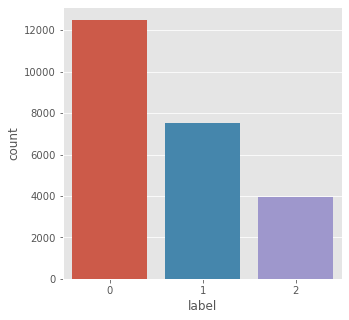

In [11]:
fig =plt.figure(figsize=(5,5))
sns.countplot(x='label',data=df)

In [20]:
#https://www.youtube.com/watch?v=B0BkUNMqfSo grafik
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
scatter_plot_points=pca.fit_transform(X.toarray())

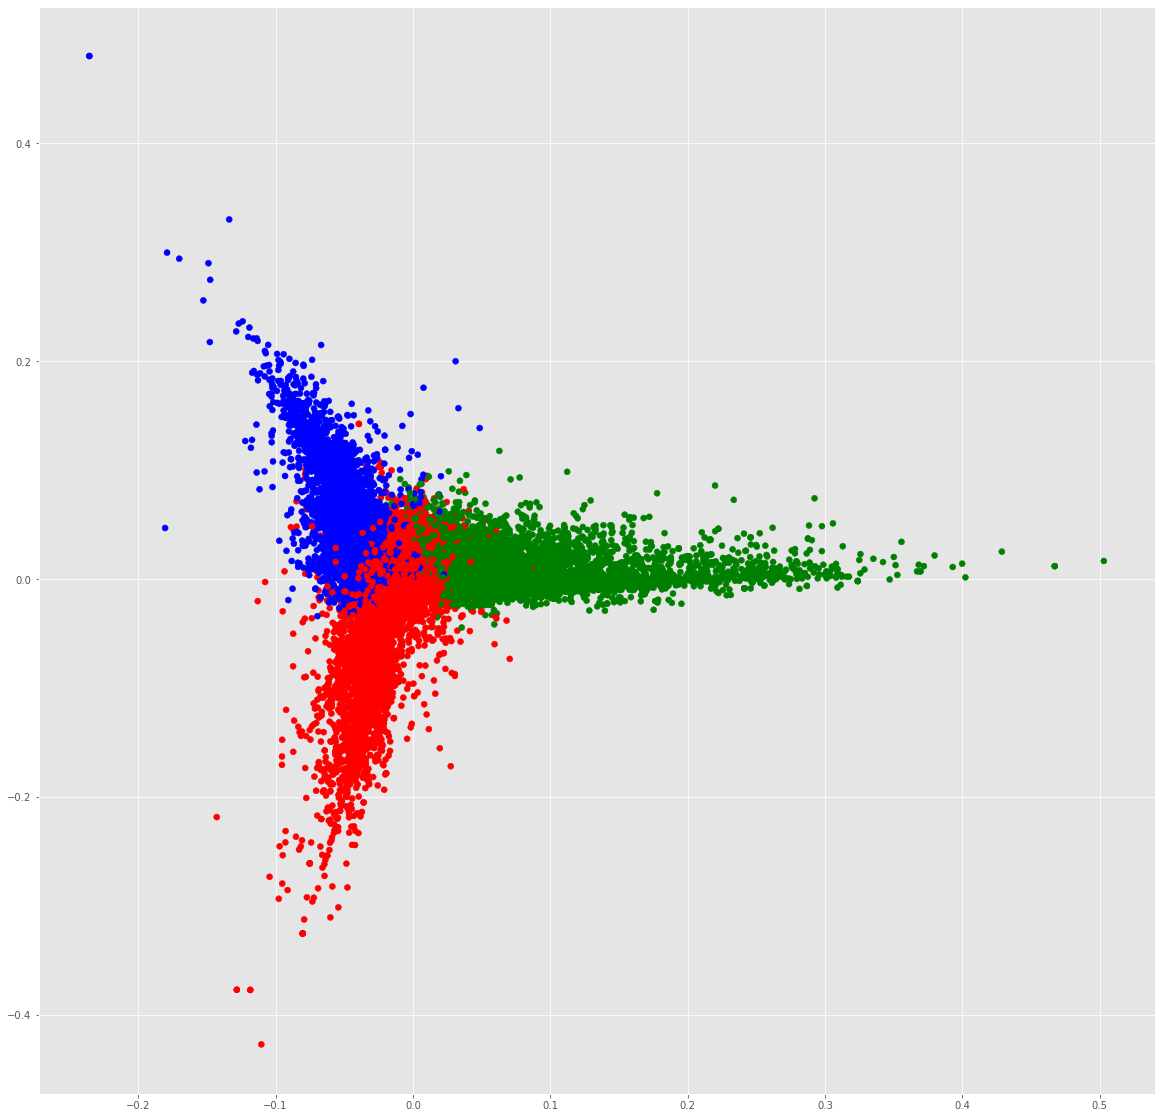

In [24]:
colors=["r","g","b"]
x_axis=[o[0] for o in scatter_plot_points]
y_axis=[o[1] for o in scatter_plot_points]

fig,ax=plt.subplots(figsize=(20,20))
ax.scatter(x_axis, y_axis,c=[colors[d] for d in predict])

# KNN

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print("trainign data shape:",X_train.shape)
print("testing data shape:",X_test.shape)


trainign data shape: (19164, 73821)
testing data shape: (4792, 73821)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
predictions=knn_model.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[2680  144  117]
 [ 259  800   39]
 [ 191   26  536]]


In [28]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2941
           1       0.82      0.73      0.77      1098
           2       0.77      0.71      0.74       753

    accuracy                           0.84      4792
   macro avg       0.82      0.78      0.80      4792
weighted avg       0.84      0.84      0.84      4792



In [29]:
print(metrics.accuracy_score(y_test,predictions))

0.8380634390651085


In [30]:
print(knn_model.score(X_train,y_train))

0.9160926737633062
